# Spotify Music Data

This dataset consists of ~600 songs that were in the top songs of the year from 2010 to 2019 (as measured by Billboard). You can explore interesting song data pulled from [Spotify](http://organizeyourmusic.playlistmachinery.com/#) such as the beats per minute, amount of spoken words, loudness, and energy of every song.

In [5]:
suppressPackageStartupMessages(library(tidyverse))

spotify_data <- read_csv('data/spotify_top_music.csv', show_col_types = FALSE)

# Rename the "top genre" column to "genre" in the spotify_data dataframe
colnames(spotify_data)[colnames(spotify_data) == "top genre"] <- "genre"

head(spotify_data, 10)

title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
Secrets,OneRepublic,dance pop,2010,148,76,52,-6,12,38,225,7,4,77
Empire State of Mind (Part II) Broken Down,Alicia Keys,hip pop,2010,93,37,48,-8,12,14,216,74,3,76


## Data dictionary

|    | Variable   | Explanation                                                |
|---:|:-----------|:-----------------------------------------------------------|
|  0 | title      | The title of the song                                      |
|  1 | artist     | The artist of the song                                     |
|  2 | top genre  | The genre of the song                                      |
|  3 | year       | The year the song was in the Billboard                     |
|  4 | bpm        | Beats per minute: the tempo of the song                    |
|  5 | nrgy       | The energy of the song: higher values mean more energetic (fast, loud)  |
|  6 | dnce       | The danceability of the song: higher values mean it's easier to dance to  |
|  7 | dB         | Decibel: the loudness of the song  |
|  8 | live       | Liveness: likeliness the song was recorded with a live audience  |
|  9 | val        | Valence: higher values mean a more positive sound (happy, cheerful) |
| 10 | dur        | The duration of the song |
| 11 | acous      | The acousticness of the song: likeliness the song is acoustic|
| 12 | spch       | Speechines: higher values mean more spoken words |
| 13 | pop        | Popularity: higher values mean more popular|

[Source](https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year) of dataset.

## Don't know where to start? 

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Which artists and genres are the most popular?
- 📊 **Visualize**: Visualize the numeric values as a time-series by year. Can you spot any changes over the years?
- 🔎 **Analyze**: Train and build a classifier to predict a song's genre based on columns 3 to 13.

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

Your friend, who is an aspiring musician, wants to make a hit song and has asked you to use your data skills to help her. You have decided to analyze what makes a top song, keeping in mind changes over the years. What concrete recommendations can you give her before she writes lyrics, makes beats, and records the song? She's open to any genre!

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

## Questions
In this project, I will be analyzing the most appearing artists and genres across the spotify music dataset. Here are the 4 questions I'll be investigating:

1. Who are the top 3 artists with the most appearance each year?
2. What are the top 3 genres with the most appearance each year?
3. Who are the top 10 most appearing artists in this dataset?
4. What are the top 10 most appearing genres in this dataset?

## Top 3 Artists for each Year

In [3]:
# Load the necessary libraries
library(dplyr)

# Group the data by year and artist, then summarize the count of appearances
top_artists_per_year <- spotify_data %>%
  group_by(year, artist) %>%
  summarize(count = n()) %>%
  arrange(year, desc(count)) %>%
  group_by(year) %>%
  slice_head(n = 3)

# Print the resulting data frame
top_artists_per_year

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


year,artist,count
<dbl>,<chr>,<int>
2010,Christina Aguilera,4
2010,Kesha,4
2010,The Black Eyed Peas,4
2011,Lady Gaga,5
2011,Beyoncé,4
2011,Jennifer Lopez,4
2012,Katy Perry,3
2012,Rihanna,3
2012,Bruno Mars,2


It seems from this result each years has different artists in the top 3. Nevertheless, there's a few artist that are in the top 3 list across multiple years, the most of which is 2 appearances. Furthermore, we can see that Justin Bieber has the most appearances in a single year at 9 in 2015, with Lady Gaga and Ed Sheeran at 5 in 2011 and 2019 respectively.

## Top 3 Genres for each Year

In [6]:
# Group the data by year and artist, then summarize the count of appearances
top_genres_per_year <- spotify_data %>%
  group_by(year, genre) %>%
  summarize(count = n()) %>%
  arrange(year, desc(count)) %>%
  group_by(year) %>%
  slice_head(n = 3)

# Print the resulting data frame
top_genres_per_year

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


year,genre,count
<dbl>,<chr>,<int>
2010,dance pop,31
2010,atl hip hop,3
2010,hip pop,3
2011,dance pop,38
2011,barbadian pop,4
2011,pop,4
2012,dance pop,15
2012,pop,7
2012,barbadian pop,3


Unlike the previous table, in this one we've got a clear winner in terms of the genre that is pretty much in all top 3 list for all the years which is dance pop. In most if not all the years, dance pop is no.1 on the list. Dance pop also has the most appearances in a single year at 52 in 2015, as well as most other years.

## Top 10 Artists in Dataset

In [8]:
# Create a summary of all artists
all_artists <- table(spotify_data$artist)

# Sort all artists by frequency in decreasing order
sorted_artists <- sort(all_artists, decreasing = TRUE)

# Create a new data frame with all artists and their frequencies
all_artists_df <- data.frame(artist = names(sorted_artists), frequency = as.numeric(sorted_artists))
all_artists_df

artist,frequency
<chr>,<dbl>
Katy Perry,17
Justin Bieber,16
Maroon 5,15
Rihanna,15
Lady Gaga,14
Bruno Mars,13
Ed Sheeran,11
Pitbull,11
Shawn Mendes,11


In [9]:
# install ggplot2
install.packages("ggplot2")

# Load the ggplot2 library
library(ggplot2)

# Create a summary of the top 10 artists
top_artists <- head(sort(table(spotify_data$artist), decreasing = TRUE), 10)

# Create a new data frame with the top artists and their frequencies
top_artists_df <- data.frame(artist = names(top_artists), frequency = as.numeric(top_artists))

Installing ggplot2 [3.4.4] ...
	OK [linked cache]


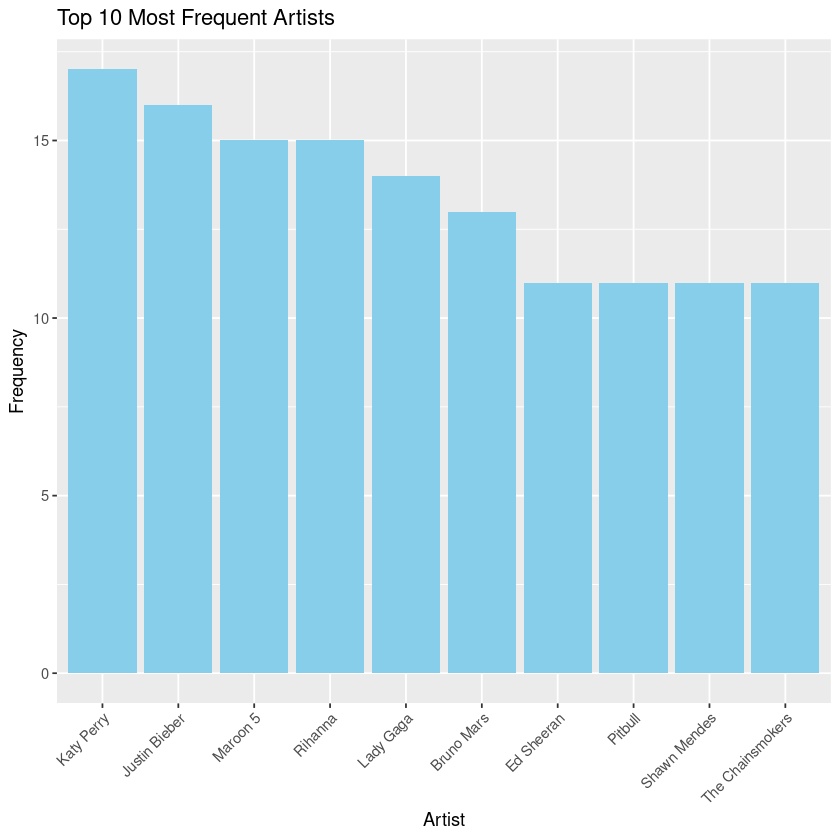

In [10]:
# Create a bar chart
ggplot(top_artists_df, aes(x = reorder(artist, -frequency), y = frequency)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Top 10 Most Frequent Artists",
       x = "Artist",
       y = "Frequency") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))

Across the whole dataset, Katy Perry has the most appearances at 17 followed by Justin Bieber and Maroon 5 at 16 and 15 respectively. There doesn't seem to be a very big gap in the number of appearance in this top 10 list.

## Top 10 Genres in Dataset

In [19]:
# Create a summary of the top 10 artists
top_genres <- head(sort(table(spotify_data$genre), decreasing = TRUE), 10)

# Create a new data frame with the top artists and their frequencies
top_genres_df <- data.frame(genre = names(top_genres), frequency = as.numeric(top_genres))
top_genres_df

genre,frequency
<chr>,<dbl>
dance pop,327
pop,60
canadian pop,34
barbadian pop,15
boy band,15
electropop,13
british soul,11
big room,10
canadian contemporary r&b,9


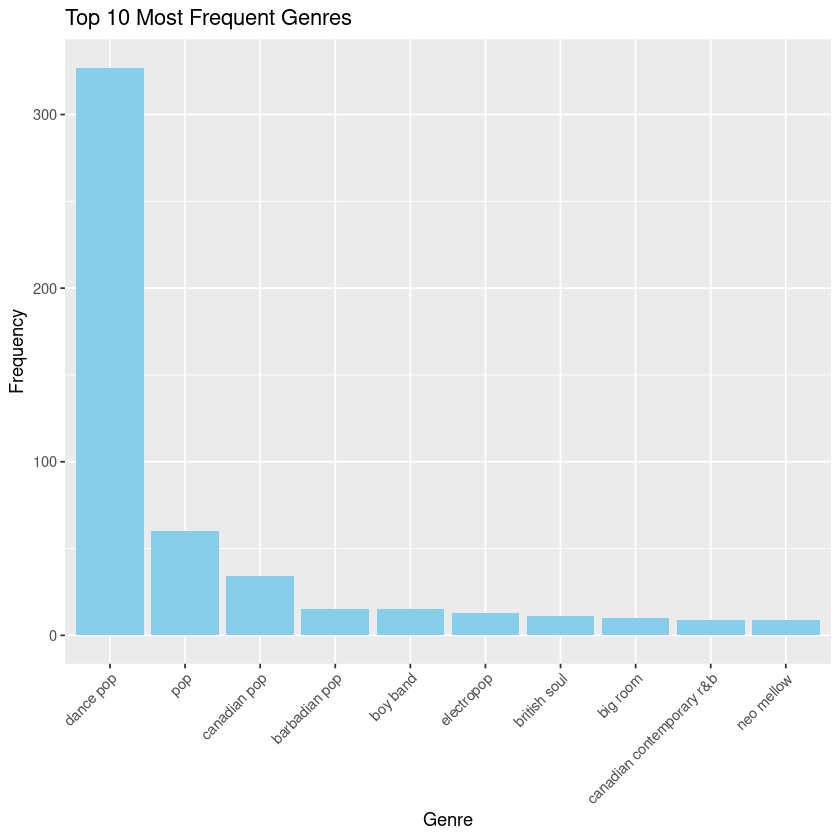

In [20]:
# Create a bar chart
ggplot(top_genres_df, aes(x = reorder(genre, -frequency), y = frequency)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Top 10 Most Frequent Genres",
       x = "Genre",
       y = "Frequency") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))

The genre that had the most appearances overall is dance pop which is not supsrising, although it's not even close with the genre in second place, pop. Pop seems to appear a lot in different variation like canadian pop and barbadian pop.

## Conclusion
To conclude, there is plenty from this analysis that were expected, pop is the most popular genre, artists like Kate Perry, Justin Bieber, Rihanna, and Ed Sheeran are in the top 10 most popular artist list. However, the dataset could use some improvement in terms of the genre naming convention, a lot of the genres here are simply pop but are given an extra variation. Overall, there is a lot of interesting information that has been gleaned from this dataset and analysis.